In [1]:
# Import necessary libraries
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database configuration
DB_CONFIG = {
    'host': 'localhost',
    'database': 'SQLTEST',
    'user': 'postgres',
    'password': 'Admin'
}

# Establish database connection
def get_db_connection():
    try:
        conn = psycopg2.connect(
            host=DB_CONFIG['host'],
            database=DB_CONFIG['database'],
            user=DB_CONFIG['user'],
            password=DB_CONFIG['password']
        )
        return conn
    except Exception as e:
        print(f"Error connecting to the database: {e}")
        return None

# Query data from the database
def fetch_data(query):
    conn = get_db_connection()
    if conn:
        try:
            df = pd.read_sql_query(query, conn)
            conn.close()
            return df
        except Exception as e:
            print(f"Error executing query: {e}")
            conn.close()
            return None


In [2]:

# Query definitions
queries = {
    'conversion_rate': """
        SELECT 
            (COUNT(DISTINCT g.id) * 100.0 / NULLIF(COUNT(DISTINCT gd.id), 0)) AS conversion_rate
        FROM 
            public.group_deals gd
        LEFT JOIN 
            public.groups g ON g.group_deals_id = gd.id
        WHERE 
            g.status = 'COMPLETED';
    """,
    'conversion_rate_over_time': """
        SELECT 
            DATE(gd.created_at) AS deal_date,
            (COUNT(DISTINCT g.id) * 100.0 / NULLIF(COUNT(DISTINCT gd.id), 0)) AS conversion_rate
        FROM 
            public.group_deals gd
        LEFT JOIN 
            public.groups g ON g.group_deals_id = gd.id
        WHERE 
            g.status = 'COMPLETED'
        GROUP BY DATE(gd.created_at)
        ORDER BY DATE(gd.created_at);
    """,
    'deal_status_proportion': """
        SELECT 
            g.status, 
            COUNT(g.id) AS deal_count
        FROM 
            public.group_deals gd
        LEFT JOIN 
            public.groups g ON g.group_deals_id = gd.id
        GROUP BY g.status;
    """,
    'average_group_size': """
        SELECT 
            gd.id AS deal_id, 
            AVG(g.size) AS avg_group_size
        FROM 
            public.group_deals gd
        LEFT JOIN 
            public.groups g ON g.group_deals_id = gd.id
        GROUP BY gd.id
        ORDER BY avg_group_size DESC;
    """,
    'deal_duration': """
        SELECT 
            gd.id AS deal_id,
            DATE_PART('day', gd.expiration_time - gd.effective_from) AS duration_days
        FROM 
            public.group_deals gd
        ORDER BY duration_days DESC;
    """,
    'top_performing_deals': """
        SELECT 
            gd.id AS deal_id, 
            COUNT(g.id) AS completed_groups
        FROM 
            public.group_deals gd
        LEFT JOIN 
            public.groups g ON g.group_deals_id = gd.id
        WHERE g.status = 'COMPLETED'
        GROUP BY gd.id
        ORDER BY completed_groups DESC
        LIMIT 10;
    """
}

In [3]:

# Fetch data for each query
conversion_rate = fetch_data(queries['conversion_rate'])
conversion_rate_over_time = fetch_data(queries['conversion_rate_over_time'])
deal_status_proportion = fetch_data(queries['deal_status_proportion'])
average_group_size = fetch_data(queries['average_group_size'])
deal_duration = fetch_data(queries['deal_duration'])
top_performing_deals = fetch_data(queries['top_performing_deals'])


C:\Users\huawei\AppData\Local\Temp\ipykernel_8884\758708553.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Error executing query: Execution failed on sql '
        SELECT 
            gd.id AS deal_id, 
            AVG(g.size) AS avg_group_size
        FROM 
            public.group_deals gd
        LEFT JOIN 
            public.groups g ON g.group_deals_id = gd.id
        GROUP BY gd.id
        ORDER BY avg_group_size DESC;
    ': column g.size does not exist
LINE 4:             AVG(g.size) AS avg_group_size
                        ^

Error executing query: Execution failed on sql '
        SELECT 
            gd.id AS deal_id,
            DATE_PART('day', gd.expiration_time - gd.effective_from) AS duration_days
        FROM 
            public.group_deals gd
        ORDER BY duration_days DESC;
    ': operator does not exist: integer - timestamp without time zone
LINE 4:             DATE_PART('day', gd.expiration_time - gd.effecti...
                                                        ^
HINT:  No operator matches the given name and argument types. You might need to add explicit type c

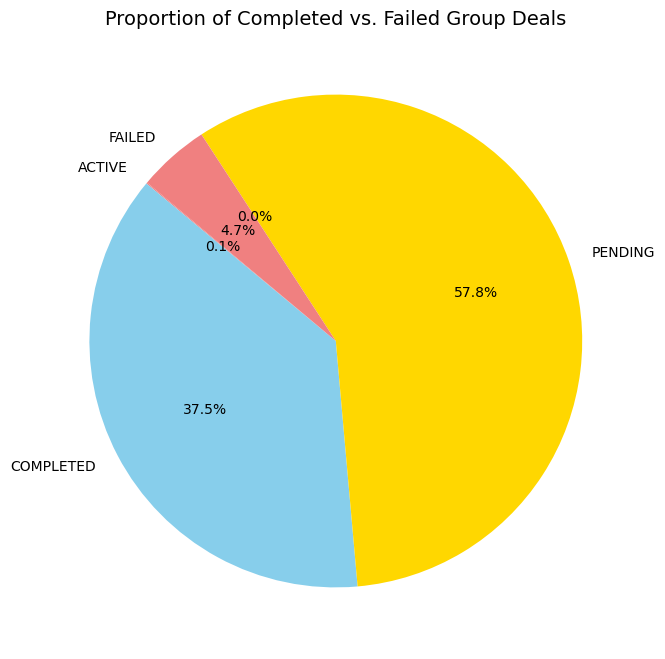

In [4]:
# 3. Pie Chart: Proportion of Deal Status
plt.figure(figsize=(8, 8))
plt.pie(
    deal_status_proportion['deal_count'], 
    labels=deal_status_proportion['status'], 
    autopct='%1.1f%%',
    colors=['lightcoral', 'skyblue', 'gold', 'lightgreen'],
    startangle=140
)
plt.title('Proportion of Completed vs. Failed Group Deals', fontsize=14)
plt.show()

In [5]:

# 4. Bar Chart: Average Group Size per Deal
plt.figure(figsize=(10, 6))
sns.barplot(
    x=average_group_size['deal_id'], 
    y=average_group_size['avg_group_size'], 
    color='purple'
)
plt.title('Average Group Size per Deal', fontsize=14)
plt.xlabel('Deal ID')
plt.ylabel('Average Group Size')
plt.xticks(rotation=45)
plt.show()


TypeError: 'NoneType' object is not subscriptable

<Figure size 1000x600 with 0 Axes>